# API Demos

The following cells demonstrate fitting ITC experiments using the `pytc` API.  The demos are arranged (roughly) from simpler to more complex fits.  The examples use ITC data in the `pytc/demos` directory.  

In [1]:
%matplotlib inline

## Fit a single-site model to an experiment
Fits binding of calcium onto EDTA. 

# Fit successful? True
# Fit sum of square residuals: 0.7022079789634887
# Fit num param: 5
# Fit num observations: 54
# Fit num degrees freedom: 49
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,fx_competent,demos/ca-edta/tris-01.DH,9.73948e-01,3.30663e-02,float,1.00000e+00,-inf,inf
local,dilution_intercept,demos/ca-edta/tris-01.DH,-6.12666e-01,1.69297e-01,float,0.00000e+00,-inf,inf
local,dH,demos/ca-edta/tris-01.DH,-1.15669e+04,1.19692e-02,float,-4.00000e+03,-inf,inf
local,K,demos/ca-edta/tris-01.DH,4.05476e+07,3.44991e-06,float,1.00000e+06,-inf,inf
local,dilution_heat,demos/ca-edta/tris-01.DH,1.15712e+03,6.51412e-04,float,0.00000e+00,-inf,inf



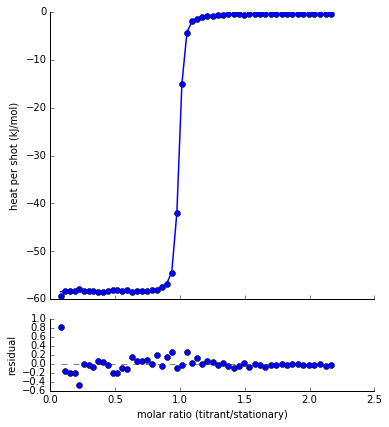

In [2]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model.  Ignore the first two shots
a = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit a binding-polynomial to an experiment
Fits binding of calcium onto EDTA. 

# Fit successful? True
# Fit sum of square residuals: 0.6983576957659196
# Fit num param: 5
# Fit num observations: 54
# Fit num degrees freedom: 49
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,dH1,demos/ca-edta/tris-01.DH,-1.15687e+04,1.19373e-02,float,-4.00000e+03,-inf,inf
local,beta1,demos/ca-edta/tris-01.DH,4.04190e+07,3.67343e-06,float,1.00000e+07,-inf,inf
local,dilution_intercept,demos/ca-edta/tris-01.DH,-6.01701e-01,1.68832e-01,float,0.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/tris-01.DH,9.73949e-01,5.84251e-02,float,1.00000e+00,-inf,inf
local,dilution_heat,demos/ca-edta/tris-01.DH,1.08484e+03,6.49625e-04,float,0.00000e+00,-inf,inf



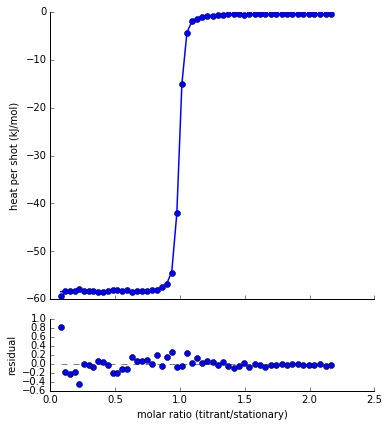

In [3]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding polynomial model
a = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.BindingPolynomial,num_sites=1,shot_start=2)
# Add the experiment to the fitter
g.add_experiment(a)
g.update_guess("beta1",1e7,a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Change parameter bounds and guesses.  Fix a parameter value.
Fits binding of calcium onto EDTA. 

# Fit successful? True
# Fit sum of square residuals: 195.8268392389318
# Fit num param: 4
# Fit num observations: 54
# Fit num degrees freedom: 50
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,fx_competent,demos/ca-edta/tris-01.DH,1.00000e+00,0.00000e+00,fixed,1.00000e+00,-inf,inf
local,dilution_intercept,demos/ca-edta/tris-01.DH,2.20846e+00,2.79876e+00,float,0.00000e+00,-inf,inf
local,dH,demos/ca-edta/tris-01.DH,-1.19075e+04,1.97830e-01,float,-4.00000e+03,-inf,inf
local,K,demos/ca-edta/tris-01.DH,1.69720e+07,1.36163e-04,float,1.00000e+03,1.00000e+00,1.00000e+12
local,dilution_heat,demos/ca-edta/tris-01.DH,-1.25968e+04,1.07690e-02,float,0.00000e+00,-inf,inf



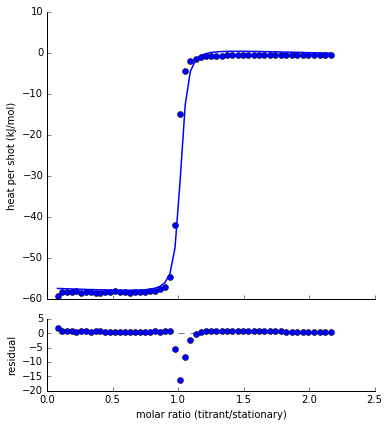

In [4]:
import pytc

"""
This will be a bad fit because we constrained the values to the wrong values.
"""

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# Update bounds and guess for "K".  Then fix fx_competent.  
g.update_bounds("K",(1,1e12),a)
g.update_guess("K",1000,a)
g.update_fixed("fx_competent",1.0,a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit a single-site model to an experiment and blank titration simultaneously
Fits binding of calcium onto EDTA. 

# Fit successful? True
# Fit sum of square residuals: 0.8935962939416904
# Fit num param: 5
# Fit num observations: 100
# Fit num degrees freedom: 95
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_heat,NA,-4.81345e+02,3.82632e-04,float,0.00000e+00,-inf,inf
global,global_intercept,NA,-3.01160e-01,1.37159e-01,float,0.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/tris-01.DH,9.74053e-01,2.72378e-02,float,1.00000e+00,-inf,inf
local,dH,demos/ca-edta/tris-01.DH,-1.16161e+04,9.69669e-03,float,-4.00000e+03,-inf,inf
local,K,demos/ca-edta/tris-01.DH,3.93751e+07,3.15016e-06,float,1.00000e+06,-inf,inf



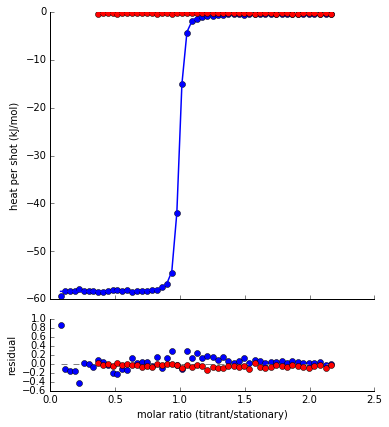

In [5]:
import pytc
%matplotlib inline

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat and
# intercept to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Load in a blank titration
b = pytc.ITCExperiment("demos/ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=10)

# Add a blank titration to the fitter. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(b)
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the single-site and blank titrations
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Fit the baseline, specifying to only use the last part of the titration to fit the baseline

# Fit successful? True
# Fit sum of square residuals: 18699.13318508061
# Fit num param: 5
# Fit num observations: 70
# Fit num degrees freedom: 65
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_heat,NA,-4.51172e+02,6.69153e-02,float,0.00000e+00,-inf,inf
global,global_intercept,NA,-5.23344e-02,2.39866e+01,float,0.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-01.DH,1.13892e+00,2.43579e+00,float,1.00000e+00,-inf,inf
local,dH,demos/ca-edta/hepes-01.DH,-4.59280e+03,1.69583e+00,float,-4.00000e+03,-inf,inf
local,K,demos/ca-edta/hepes-01.DH,3.79453e+07,3.25068e-04,float,1.00000e+06,-inf,inf



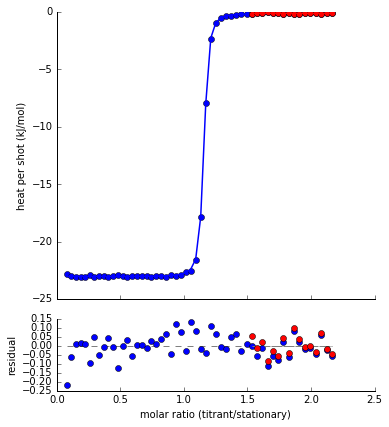

In [6]:
import pytc
%matplotlib inline

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat and
# intercept to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Load in a blank titration
b = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.Blank,shot_start=40)

# Add a blank titration to the fitter. Adding it with a large weight 
# makes sure the fitter uses this baseline. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(b, weight=1000) 
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the single-site and blank titrations
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Fit a single-site model to three experimental replicate titrations, with a blank titration
Fits binding of calcium onto EDTA. 

# Fit successful? True
# Fit sum of square residuals: 3.6091488885044543
# Fit num param: 7
# Fit num observations: 216
# Fit num degrees freedom: 209
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_K,NA,4.20408e+07,2.09522e-06,float,1.00000e+06,-inf,inf
global,global_heat,NA,9.77651e+02,6.24715e-04,float,0.00000e+00,-inf,inf
global,global_intercept,NA,-3.88970e-01,1.85842e-01,float,0.00000e+00,-inf,inf
global,global_dH,NA,-4.57753e+03,1.31391e-02,float,-4.00000e+03,-inf,inf
local,fx_competent,demos/ca-edta/hepes-01.DH,1.13804e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-02.DH,1.14382e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-03.DH,1.14855e+00,1.76954e-02,float,1.00000e+00,-inf,inf



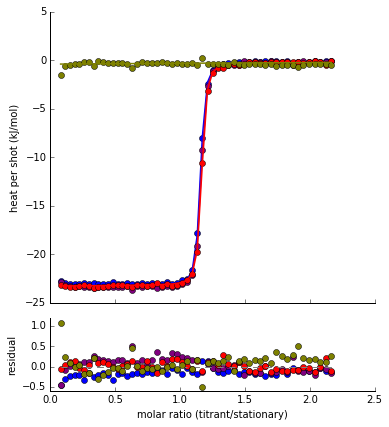

In [7]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")
g.link_to_global(a,"K","global_K")
g.link_to_global(a,"dH","global_dH")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
b = pytc.ITCExperiment("demos/ca-edta/hepes-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(b)
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")
g.link_to_global(b,"K","global_K")
g.link_to_global(b,"dH","global_dH")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
c = pytc.ITCExperiment("demos/ca-edta/hepes-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(c)
g.link_to_global(c,"dilution_heat","global_heat")
g.link_to_global(c,"dilution_intercept","global_intercept")
g.link_to_global(c,"K","global_K")
g.link_to_global(c,"dH","global_dH")

# --------------------------------------------------------------------
# Load in a blank titration
d = pytc.ITCExperiment("demos/ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)

# Add a blank titration to the fitter. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(d)
g.link_to_global(d,"dilution_heat","global_heat")
g.link_to_global(d,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the four titrations
g.fit()

# --------------------------------------------------------------------

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit three experiments in different buffers (with paired blanks) to determine buffer-independent enthalpy and number of protons exchanged on binding
Fits binding of calcium onto EDTA in HEPES, Tris, and Imidazole.

# Fit successful? True
# Fit sum of square residuals: 12.136326996320356
# Fit num param: 12
# Fit num observations: 324
# Fit num degrees freedom: 312
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,hepes_heat,NA,-4.04134e+02,9.37603e-04,float,0.00000e+00,-inf,inf
global,num_protons,NA,-1.10023e+00,0.00000e+00,float,0.00000e+00,-inf,inf
global,imid_intercept,NA,-8.19163e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,dH_global,NA,7.70482e+02,0.00000e+00,float,-4.00000e+03,-inf,inf
global,global_K,NA,4.33272e+07,0.00000e+00,float,1.00000e+06,-inf,inf
global,imid_heat,NA,3.48387e+03,0.00000e+00,float,0.00000e+00,-inf,inf
global,hepes_intercept,NA,-2.01588e-01,2.78921e-01,float,0.00000e+00,-inf,inf
global,tris_intercept,NA,-2.30795e-02,0.00000e+00,float,0.00000e+00,-inf,inf
global,tris_heat,NA,-2.37408e+03,0.00000e+00,float,0.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-01.DH,1.13807e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,fx_compete

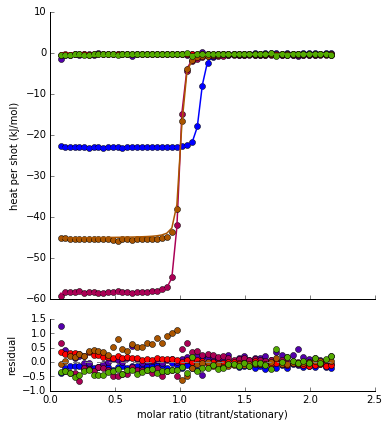

In [8]:
# --------------------------------------------------------------------
# define buffer ionization enthalpies.
# goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
HEPES_IONIZATION_DH = 20.4/4.184*1000
TRIS_IONIZATION_DH = 47.45/4.184*1000
IMID_IONIZATION_DH = 36.64/4.184*1000 

import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.global_models.ProtonLinked()

# ------------------------------------------------------------------------------------
# HEPES buffer experiment

hepes = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(hepes,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes,"K","global_K")
g.link_to_global(hepes,"dH","dH_global")
g.link_to_global(hepes,"dilution_heat","hepes_heat")
g.link_to_global(hepes,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# HEPES buffer blank

hepes_blank = pytc.ITCExperiment("demos/ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(hepes_blank,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes_blank,"dilution_heat","hepes_heat")
g.link_to_global(hepes_blank,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer experiment

tris = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(tris,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris,"K","global_K")
g.link_to_global(tris,"dH","dH_global")
g.link_to_global(tris,"dilution_heat","tris_heat")
g.link_to_global(tris,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer blank

tris_blank = pytc.ITCExperiment("demos/ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(tris_blank,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris_blank,"dilution_heat","tris_heat")
g.link_to_global(tris_blank,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer experiment

imid = pytc.ITCExperiment("demos/ca-edta/imid-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(imid,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid,"K","global_K")
g.link_to_global(imid,"dH","dH_global")
g.link_to_global(imid,"dilution_heat","imid_heat")
g.link_to_global(imid,"dilution_intercept","imid_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer blank

imid_blank = pytc.ITCExperiment("demos/ca-edta/imid-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(imid_blank,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid_blank,"dilution_heat","imid_heat")
g.link_to_global(imid_blank,"dilution_intercept","imid_intercept")

# --------------------------------------------------------------------
# Do a global fit
g.fit()

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


# Fit successful? True
# Fit sum of square residuals: 18.30545650960772
# Fit num param: 18
# Fit num observations: 648
# Fit num degrees freedom: 630
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,hepes_heat,NA,-1.54768e+02,0.00000e+00,float,0.00000e+00,-inf,inf
global,num_protons,NA,-1.09746e+00,1.81503e+00,float,0.00000e+00,-inf,inf
global,imid_intercept,NA,-7.11929e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,dH_global,NA,7.38286e+02,1.70429e-02,float,-4.00000e+03,-inf,inf
global,global_K,NA,4.25701e+07,5.51230e-06,float,1.00000e+06,-inf,inf
global,imid_heat,NA,2.76129e+03,0.00000e+00,float,0.00000e+00,-inf,inf
global,hepes_intercept,NA,-2.10594e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,tris_intercept,NA,-7.46512e-02,2.41065e-01,float,0.00000e+00,-inf,inf
global,tris_heat,NA,-1.72991e+03,1.43788e-03,float,0.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-01.DH,1.13789e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,fx_competen

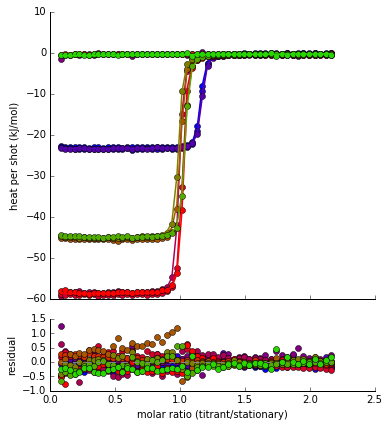

In [9]:
# --------------------------------------------------------------------
# define buffer ionization enthalpies.
# goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
HEPES_IONIZATION_DH = 20.4/4.184*1000
TRIS_IONIZATION_DH = 47.45/4.184*1000
IMID_IONIZATION_DH = 36.64/4.184*1000 

import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.global_models.ProtonLinked()

# ------------------------------------------------------------------------------------
# HEPES buffer experiment

hepes1 = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(hepes1,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes1,"K","global_K")
g.link_to_global(hepes1,"dH","dH_global")
g.link_to_global(hepes1,"dilution_heat","hepes_heat")
g.link_to_global(hepes1,"dilution_intercept","hepes_intercept")


hepes2 = pytc.ITCExperiment("demos/ca-edta/hepes-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(hepes2,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes2,"K","global_K")
g.link_to_global(hepes2,"dH","dH_global")
g.link_to_global(hepes2,"dilution_heat","hepes_heat")
g.link_to_global(hepes2,"dilution_intercept","hepes_intercept")

hepes3 = pytc.ITCExperiment("demos/ca-edta/hepes-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(hepes3,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes3,"K","global_K")
g.link_to_global(hepes3,"dH","dH_global")
g.link_to_global(hepes3,"dilution_heat","hepes_heat")
g.link_to_global(hepes3,"dilution_intercept","hepes_intercept")

hepes_blank = pytc.ITCExperiment("demos/ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(hepes_blank,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes_blank,"dilution_heat","hepes_heat")
g.link_to_global(hepes_blank,"dilution_intercept","hepes_intercept")


# ------------------------------------------------------------------------------------
# Tris buffer experiment

tris1 = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(tris1,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris1,"K","global_K")
g.link_to_global(tris1,"dH","dH_global")
g.link_to_global(tris1,"dilution_heat","tris_heat")
g.link_to_global(tris1,"dilution_intercept","tris_intercept")

tris2 = pytc.ITCExperiment("demos/ca-edta/tris-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(tris2,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris2,"K","global_K")
g.link_to_global(tris2,"dH","dH_global")
g.link_to_global(tris2,"dilution_heat","tris_heat")
g.link_to_global(tris2,"dilution_intercept","tris_intercept")

tris3 = pytc.ITCExperiment("demos/ca-edta/tris-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(tris3,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris3,"K","global_K")
g.link_to_global(tris3,"dH","dH_global")
g.link_to_global(tris3,"dilution_heat","tris_heat")
g.link_to_global(tris3,"dilution_intercept","tris_intercept")


tris_blank = pytc.ITCExperiment("demos/ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(tris_blank,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris_blank,"dilution_heat","tris_heat")
g.link_to_global(tris_blank,"dilution_intercept","tris_intercept")


# ------------------------------------------------------------------------------------
# Imidazole buffer experiment

imid1 = pytc.ITCExperiment("demos/ca-edta/imid-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(imid1,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid1,"K","global_K")
g.link_to_global(imid1,"dH","dH_global")
g.link_to_global(imid1,"dilution_heat","imid_heat")
g.link_to_global(imid1,"dilution_intercept","imid_intercept")

imid2 = pytc.ITCExperiment("demos/ca-edta/imid-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(imid2,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid2,"K","global_K")
g.link_to_global(imid2,"dH","dH_global")
g.link_to_global(imid2,"dilution_heat","imid_heat")
g.link_to_global(imid2,"dilution_intercept","imid_intercept")

imid3 = pytc.ITCExperiment("demos/ca-edta/imid-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(imid3,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid3,"K","global_K")
g.link_to_global(imid3,"dH","dH_global")
g.link_to_global(imid3,"dilution_heat","imid_heat")
g.link_to_global(imid3,"dilution_intercept","imid_intercept")

imid_blank = pytc.ITCExperiment("demos/ca-edta/imid-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(imid_blank,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid_blank,"dilution_heat","imid_heat")
g.link_to_global(imid_blank,"dilution_intercept","imid_intercept")

# --------------------------------------------------------------------
# Do a global fit
g.fit()

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Fit single-site binding curves to experiments at two temperatures to extract the change in heat capacity for binding.
Fits binding of Zn to human S100A14 at 10 and 25 C. 

/home/harmsm/work/programming/git-clones/pytc/pytc/indiv_models/single_site.py:65: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


# Fit successful? True
# Fit sum of square residuals: 0.20076750602322985
# Fit num param: 10
# Fit num observations: 32
# Fit num degrees freedom: 22
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,dH_global,NA,1.09821e+05,8.94631e-03,float,-4.00000e+03,-inf,inf
global,dCp,NA,-1.11446e+04,3.14950e-02,float,0.00000e+00,-inf,inf
local,fx_competent,demos/temp-dependence/10C.DH,1.07481e+00,4.05171e-01,float,1.00000e+00,-inf,inf
local,dilution_intercept,demos/temp-dependence/10C.DH,7.85893e+00,1.35098e-01,float,0.00000e+00,-inf,inf
local,K,demos/temp-dependence/10C.DH,1.08462e+04,2.37071e-03,float,1.00000e+06,-inf,inf
local,dilution_heat,demos/temp-dependence/10C.DH,-7.35998e+03,2.18241e-03,float,0.00000e+00,-inf,inf
local,fx_competent,demos/temp-dependence/25C.DH,1.10000e+00,0.00000e+00,float,1.00000e+00,9.00000e-01,1.10000e+00
local,dilution_intercept,demos/temp-dependence/25C.DH,1.32723e+01,0.00000e+00,float,0.00000e+00,-inf,inf
local,K,demos/temp-dependen

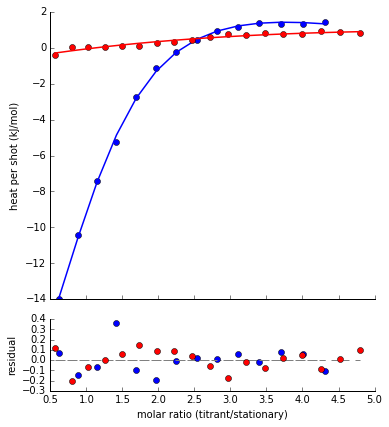

In [10]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.global_models.TempDependence()

t10 = pytc.ITCExperiment("demos/temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=2)
g.add_experiment(t10)
g.link_to_global(t10,"dH","dH_global")

t25 = pytc.ITCExperiment("demos/temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=2)
g.add_experiment(t25)
g.link_to_global(t25,"dH","dH_global")

g.update_bounds("fx_competent",(0.9,1.1),t25)


# Do fit
g.fit()

# Show the results
fit, ax = g.plot()
print(g.fit_as_csv)


## Use an F-test to decide whether or not to float the fraction of competent molecules

Fitting model 1.

Model 1 fit
# Fit successful? True
# Fit sum of square residuals: 0.7022079789634887
# Fit num param: 5
# Fit num observations: 54
# Fit num degrees freedom: 49
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,fx_competent,demos/ca-edta/tris-01.DH,9.73948e-01,3.30663e-02,float,1.00000e+00,-inf,inf
local,dilution_intercept,demos/ca-edta/tris-01.DH,-6.12666e-01,1.69297e-01,float,0.00000e+00,-inf,inf
local,dH,demos/ca-edta/tris-01.DH,-1.15669e+04,1.19692e-02,float,-4.00000e+03,-inf,inf
local,K,demos/ca-edta/tris-01.DH,4.05476e+07,3.44991e-06,float,1.00000e+06,-inf,inf
local,dilution_heat,demos/ca-edta/tris-01.DH,1.15712e+03,6.51412e-04,float,0.00000e+00,-inf,inf


Fitting model 2.

Model 2.fit
# Fit successful? True
# Fit sum of square residuals: 195.82683920399194
# Fit num param: 4
# Fit num observations: 54
# Fit num degrees freedom: 50
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,fx_competent,demos/ca-edta

(True, 1.1102230246251565e-16)

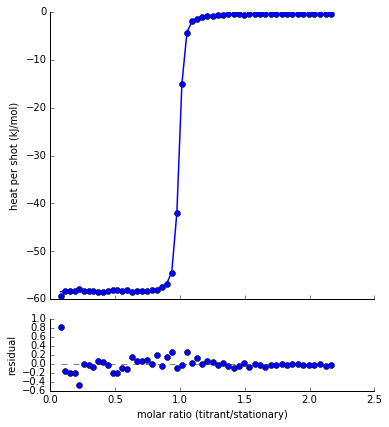

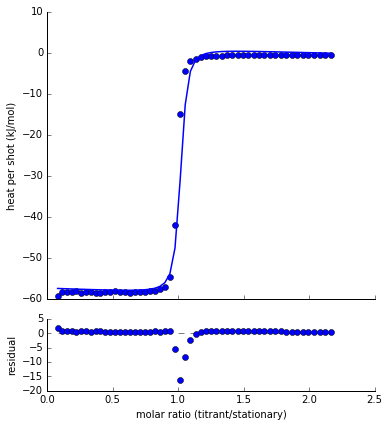

In [11]:
import pytc
from pytc import util

# Create a one site model where all parameters float
one_site = pytc.GlobalFit()
a = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",
                        pytc.indiv_models.SingleSite,
                        shot_start=2)
one_site.add_experiment(a)


# Now create a model where the fx_competent is fixed to 1.0
two_site = pytc.GlobalFit()
b = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",
                       pytc.indiv_models.SingleSite,
                       shot_start=2)
two_site.add_experiment(b)
two_site.update_fixed("fx_competent",1.0,b)

util.choose_model(one_site,two_site,alpha=0.05)
